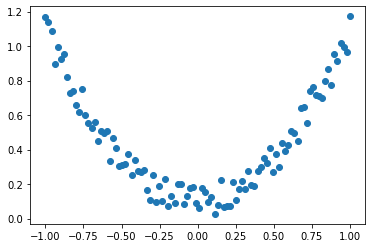

In [1]:
import torch
import matplotlib.pyplot as plt

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# 画图
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

# print(torch.unsqueeze(torch.rand(5), dim=1))

In [2]:
import torch
import torch.nn.functional as F     # 激励函数都在这

class Net(torch.nn.Module):  # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层线性输出

    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.predict(x)             # 输出值
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)

print(net)  # net 的结构

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [3]:
# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 传入 net 的所有参数, 学习率
loss_func = torch.nn.MSELoss()      # 预测值和真实值的误差计算公式 (均方差)

for t in range(100):
    prediction = net(x)     # 喂给 net 训练数据 x, 输出预测值

    loss = loss_func(prediction, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上

In [4]:
import matplotlib.pyplot as plt

plt.ion()   # 画图
plt.show()

for t in range(200):

    ...
    loss.backward()
    optimizer.step()

    # 接着上面来
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [7]:
import gym
env = gym.make('CartPole-v0')
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

[ 0.03563112 -0.00471483  0.01975584 -0.00341262]
[ 0.03553683  0.19011831  0.01968759 -0.28979745]
[ 0.03933919  0.38495407  0.01389164 -0.57620668]
[ 0.04703827  0.18964017  0.00236751 -0.2791801 ]
[ 0.05083108 -0.00551547 -0.00321609  0.0142486 ]
[ 0.05072077 -0.20059115 -0.00293112  0.30591507]
[ 0.04670894 -0.00542755  0.00318718  0.01230919]
[ 0.04660039 -0.20059507  0.00343336  0.305996  ]
[ 0.04258849 -0.39576578  0.00955328  0.59975974]
[ 0.03467318 -0.20077877  0.02154848  0.31010121]
[ 0.0306576  -0.00597036  0.0277505   0.02429119]
[ 0.03053819 -0.20147906  0.02823633  0.32559893]
[ 0.02650861 -0.39699142  0.0347483   0.62705095]
[ 0.01856878 -0.20237127  0.04728932  0.34551089]
[ 0.01452136 -0.3981329   0.05419954  0.65272294]
[ 0.0065587  -0.59396606  0.067254    0.96196819]
[-0.00532062 -0.39980921  0.08649336  0.69114909]
[-0.0133168  -0.59601803  0.10031634  1.00975947]
[-0.02523716 -0.40236762  0.12051153  0.75018778]
[-0.03328452 -0.20909568  0.13551529  0.49772718]


[ 0.09002878  0.76354334 -0.0939797  -1.17670052]
[ 0.10529965  0.56975937 -0.11751371 -0.91489665]
[ 0.11669484  0.376406   -0.13581164 -0.66133644]
[ 0.12422296  0.18340902 -0.14903837 -0.41431271]
[ 0.12789114  0.38029439 -0.15732463 -0.7500221 ]
[ 0.13549703  0.57719591 -0.17232507 -1.08778964]
[ 0.14704094  0.77411899 -0.19408086 -1.42921244]
Episode finished after 17 timesteps
[-0.01864911 -0.03364461  0.01822605 -0.03200853]
[-0.019322    0.1612113   0.01758588 -0.31888567]
[-0.01609777 -0.03415664  0.01120817 -0.02070909]
[-0.0167809  -0.22943752  0.01079399  0.27548896]
[-0.02136965 -0.03447122  0.01630377 -0.01377008]
[-0.02205908 -0.22982315  0.01602836  0.28401196]
[-0.02665554 -0.42517     0.0217086   0.58170673]
[-0.03515894 -0.62058928  0.03334274  0.88114842]
[-0.04757073 -0.42593574  0.05096571  0.59913134]
[-0.05608944 -0.62173233  0.06294833  0.9074223 ]
[-0.06852409 -0.8176474   0.08109678  1.21920746]
[-0.08487704 -0.62365907  0.10548093  0.95299762]
[-0.09735022 -